In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

# Not the NBA

In [33]:
df = pd.read_csv("ages-and-names.csv")
df.head()

,age,name length,age_bin
0,67,5,Old people
1,11,3,Children
2,52,8,Old people
3,58,11,Old people
4,17,10,Teens


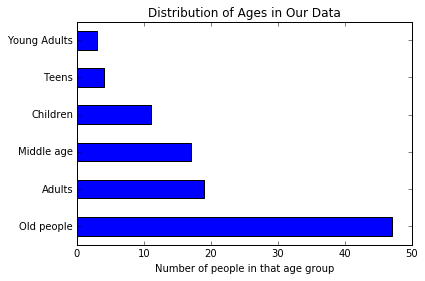

In [34]:
ax = df['age_bin'].value_counts().plot(kind="barh")
ax.set_title("Distribution of Ages in Our Data")
# ax.set_ylabel("Age Group") # this is obvious -- doesn't need to be labeled. 
ax.set_xlabel("Number of people in that age group")
plt.savefig("age-distribution.pdf")

# The NBA

In [36]:
# Import the performance data
performance_df = pd.read_excel("NBA stats.xlsx", sheetname="Player performance")
performance_df.head()

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,4.6,5.4,6.7,3.3,2.1,0.2,2.0,15,2,30.1
1,James Harden,Houston Rockets,26,82,41,41,38.1,8.7,19.7,43.9,...,5.3,6.1,7.5,4.6,1.7,0.6,2.8,23,3,29.0
2,Kevin Durant,Oklahoma City Thunder,27,72,52,20,35.8,9.7,19.2,50.5,...,7.6,8.2,5.0,3.5,1.0,1.2,1.9,27,1,28.2
3,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,9.1,11.5,3.3,3.8,1.6,1.4,3.6,47,1,26.9
4,LeBron James,Cleveland Cavaliers,31,76,56,20,35.6,9.7,18.6,52.0,...,6.0,7.4,6.8,3.3,1.4,0.6,1.9,28,3,25.3


In [37]:
# Import the salary data
salary_df = pd.read_excel("NBA stats.xlsx", sheetname="2016-2017 Salaries")
salary_df.head()

,RK,NAME,POS,TEAM,SALARY
0,1,Mike Conley,PG,Memphis Grizzlies,26540100
1,2,Al Horford,C,Boston Celtics,26540100
2,3,Carmelo Anthony,SF,New York Knicks,24559380
3,4,Damian Lillard,PG,Portland Trail Blazers,24328425
4,5,Chris Bosh,PF,Miami Heat,23741060


In [38]:
# Merge the two together
df = performance_df.merge(salary_df, left_on='Player', right_on='NAME')
df.head()

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,PTS,RK,NAME,POS,TEAM_y,SALARY
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,0.2,2.0,15,2,30.1,68,Stephen Curry,PG,Golden State Warriors,12112359
1,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,1.4,3.6,47,1,26.9,35,DeMarcus Cousins,C,Sacramento Kings,16957900
2,Damian Lillard,Portland Trail Blazers,25,75,40,35,35.7,8.2,19.7,41.9,...,0.4,2.2,15,0,25.1,4,Damian Lillard,PG,Portland Trail Blazers,24328425
3,Anthony Davis,New Orleans Pelicans,23,61,24,37,35.5,9.2,18.6,49.3,...,2.0,2.4,36,0,24.3,11,Anthony Davis,PF,New Orleans Pelicans,22116750
4,Russell Westbrook,Oklahoma City Thunder,27,80,55,25,34.4,8.2,18.1,45.4,...,0.3,2.5,54,18,23.5,24,Russell Westbrook,PG,Oklahoma City Thunder,17769374


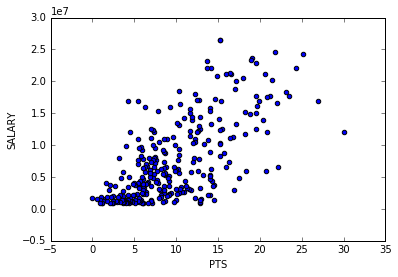

In [39]:
df.plot(kind="scatter", x="PTS", y="SALARY")

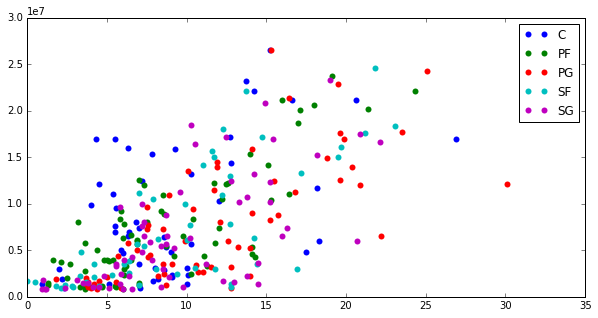

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
for category, group in df.groupby('POS'):
    ax.plot(group['PTS'], group['SALARY'], marker='o', linestyle='', label=category, markeredgewidth=0)
ax.set_xlim([0, 35])
ax.set_ylim([0, 30000000])
ax.legend()
plt.savefig('nba-pos-vs-salary.pdf')